In [2]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import time
#import seaborn as sns
from sklearn.externals import joblib
import csv
import shap

/home/veruska/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
city = 'CityA'
#city = 'Curitiba'

data_path = '../../data/output/' + city + '/normalized_data_X.csv'
y_path = '../../data/output/' + city + '/y.csv'

data = pd.read_csv(data_path)
y = pd.read_csv(y_path)
print(data.shape)
print(y.shape)
data.head()

(1432633, 420)
(1432633, 1)


,route,tripNum,shapeSequence,shapeLat,shapeLon,distanceTraveledShape,busCode,gpsPointId,gpsLat,gpsLon,...,alertTypeSB_ACCIDENT,alertTypeSB_CHIT_CHAT,alertTypeSB_HAZARD,alertTypeSB_JAM,alertTypeSB_NORMAL,alertTypeSB_POLICE,alertTypeSB_ROAD_CLOSED,jamBlockTypeSB_-,jamBlockTypeSB_NORMAL,jamBlockTypeSB_ROAD_CLOSED_EVENT
0,0.118068,0.066667,0.085019,0.264600,0.496150,0.057584,0.0,0.000000,0.266155,0.496047,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.118068,0.066667,0.085026,0.270218,0.501802,0.064231,0.0,0.000148,0.271812,0.501642,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.118068,0.066667,0.085033,0.273653,0.505296,0.068301,0.0,0.000000,0.275187,0.505192,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.118068,0.066667,0.085039,0.277433,0.509404,0.072900,0.0,0.000149,0.280622,0.510132,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.118068,0.066667,0.085053,0.280050,0.513166,0.077983,0.0,0.000155,0.281878,0.513178,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# same data of rvm test
# for the experiment with the rvm
data_size = 5000

data = data[0:data_size]
y = y[0:data_size]
print(data.shape)
print(y.shape)

(5000, 420)
(5000, 1)


In [4]:
selected_index=[0,1,2,3,5,7,9,10,11,12,13,15,17,18,19,20,21,22,
                23,24,25,27,28,29,31,32,33,34,35,37,39,40,41,42,43,44,
                45,46,47,48,49,50,51,52,69,70,71,72,73,74,75,76,77,78,
                79,80,81,82,83,84,85,90,93,95,96,97,98,99,100,101,104,105,
                106,107,108,109,110,111,112,113,114,116,117,118,119,126,128,129,130,131,
                132,133,136,137,138,139,140,142,143,144]

# get columns name by index
data = data[data.columns[selected_index]]
data.shape

(1432633, 100)

In [4]:
# Making training and test data: 80% Training, 20% Test
random.seed(15) #to get always the same set
train_X, test_X, train_Y, test_Y = train_test_split(data, y, test_size=0.20, random_state=7)

In [5]:
# Saving test files
# test_X.to_csv("../../data/output/test_X.csv", index=False)
# test_Y.to_csv("../../data/output/test_Y.csv", index=False)

# Reading same test files to be used in the same experiments
test_path = '../../data/output/' + city

test_X = pd.read_csv(test_path + '/test_X.csv')
test_Y = pd.read_csv(test_path + '/test_Y.csv')

### Random Forest

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarni

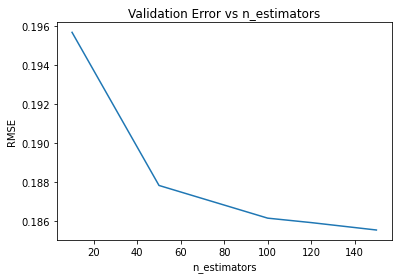

In [ ]:
start = time.time()

n_estimators = [10, 50, 100, 120, 150] #number of trees
cv_rf_rmse = [rmse_cv(RandomForestClassifier(n_estimators = n, n_jobs=-1), train_X, train_Y).mean() 
            for n in n_estimators]

series = pd.Series(cv_rf_rmse, index = n_estimators)
plot_rmse_param(series, "n_estimators")
best_rmse_rf, best_estimator_rf = best_rmse_param(series)

In [ ]:
n_min_samples_split = [5, 10, 15, 20, 25]
cv_rf_rmse = [rmse_cv(RandomForestClassifier(n_estimators = best_estimator_rf, min_samples_split = n, n_jobs=-1), 
                      train_X, train_Y).mean() 
            for n in n_min_samples_split]

series = pd.Series(cv_rf_rmse, index = n_min_samples_split)
plot_rmse_param(series, "n_min_samples_split")
best_rmse_rf, best_split_rf = best_rmse_param(series)

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarni

In [ ]:
n_features = [0.25, 0.33, 0.5, 0.75, 0.8]
cv_rf_rmse = [rmse_cv(RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                                            max_features=n, n_jobs=-1), 
                      train_X, train_Y).mean() 
            for n in n_features]

series = pd.Series(cv_rf_rmse, index = n_features)
plot_rmse_param(series, "max_features")
best_rmse_rf, best_max_feat_rf = best_rmse_param(series)

In [11]:
#Curitiba
print("best_estimator_rf: " + str(best_estimator_rf))
print("best_split_rf: " + str(best_split_rf))
print("best_max_features_rf: " + str(best_max_feat_rf))

best_estimator_rf: 150
best_split_rf: 5
best_max_features_rf: 0.8


In [6]:
best_estimator_rf = 100
best_split_rf = 5
best_max_feat_rf = 0.8

In [16]:
#Recife
print("best_estimator_rf: " + str(best_estimator_rf))
print("best_split_rf: " + str(best_split_rf))
print("best_max_features_rf: " + str(best_max_feat_rf))

best_estimator_rf: 100
best_split_rf: 5
best_max_features_rf: 0.8


In [7]:
#Recife
random.seed(42)

try:
    start
except NameError: # start does not exist at all
    start = time.time()

rf = RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=-1)
rf.fit(train_X, train_Y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Execution time: 24.46661021709442 min


In [20]:
#Recife - all data
random.seed(42)

try:
    start
except NameError: # start does not exist at all
    start = time.time()

rf = RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=-1)
rf.fit(train_X, train_Y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Execution time: 30.421087340513864 min


In [9]:
# City A
# GridSearch to find best parameter values using the smaller dataset (5%)
random.seed(42)

rf_parameters = {
    'n_estimators':[25, 50, 75, 100, 125, 150],
    'min_samples_split':[1, 5, 10, 15, 20, 25],
    'max_features':[0.5, 0.6, 0.7, 0.8, 0.9]
}

start = time.time()

rf = RandomForestClassifier()
gridS = GridSearchCV(rf, rf_parameters, scoring=make_scorer(f1_score), n_jobs=-1)
gridS.fit(data, y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")
print("The best parameters values are: " + gridS.get_params())

/home/veruska/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Execution time: 137.12549107869467 min


TypeError: must be str, not dict

In [11]:
gridS.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
# Random Forest after GridSearch

# values of the gridSearch (previous step)
best_estimator_rf = 25
best_split_rf = 15
best_max_feat_rf = 0.9

start = time.time()

rf = RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=-1)
rf.fit(train_X, train_Y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")

/home/veruska/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Execution time: 7.436480136712392 min


In [ ]:
#Curitiba
random.seed(42)

try:
    start
except NameError: # start does not exist at all
    start = time.time()

rf = RandomForestClassifier(n_estimators=best_estimator_rf, min_samples_split=best_split_rf,
                           max_features=best_max_feat_rf, n_jobs=-1)
rf.fit(train_X, train_Y)

end = time.time()
print("Execution time: " + str((end - start)/60) + " min")

/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [17]:
print("Execution time: " + str((end - start)/60) + " min")

Execution time: 2931.5283333977063 min


In [18]:
# Saving a pickle file for the model
joblib.dump(rf, 'Saved_Recife_RF_100_5_08_BB_class_' + str(data_size) + '.pkl')

['Saved_Recife_RF_100_5_08_BB_class_5000.pkl']

In [8]:
# Saving a pickle file for the model
joblib.dump(rf, 'Saved_Curitiba_RF_10_5_08_gps_gtfs_BB_class.pkl')

['Saved_Curitiba_RF_10_5_08_gps_gtfs_BB_class.pkl']

### SHAP values

#### City A

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(train_X)
shap.summary_plot(shap_values, train_X, plot_type="bar")

#### Curitiba

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(train_X)
shap.summary_plot(shap_values, train_X, plot_type="bar")

### Evaluating model

In [8]:
def get_quality(bb_pred):
    #headway
    #alpha = y.headwayThreshold[test_Y.index]
    
    #bb_pred = np.less_equal(pred, alpha)
    #bb_label = np.less_equal(test_Y, alpha)
    
    #rmse = np.sqrt(mean_squared_error(test_Y, pred))
    #print('RMSE: ' + str(rmse))
    
    bb_label = test_Y
    
    # Bus Bunching
    print("Accuracy: " + str(accuracy_score(bb_label, bb_pred)))
    print("Precision: " + str(precision_score(bb_label, bb_pred)))
    print("Recall: " + str(recall_score(bb_label, bb_pred)))
    print("F-measure: " + str(f1_score(bb_label, bb_pred)))

In [7]:
pred_array = rf.predict(test_X)
pred_array

array([0., 1., 0., ..., 0., 0., 0.])

R2 coefficient (score) of determination is a statistical measure of how well the regression predictions approximate the real data points. The best one is 1.

In [8]:
r2 = rf.score(test_X, test_Y)
print(str(r2) + " of the data is been explained by the model.")

0.9449475965615806 of the data is been explained by the model.


### City A

In [9]:
get_quality(pred_array) # 100%

Accuracy: 0.9449475965615806
Precision: 0.8895684559401373
Recall: 0.6748839982372916
F-measure: 0.767496020281823


### Curitiba

In [17]:
get_quality(pred_array) #30000

Accuracy: 0.9728333333333333
Precision: 0.9343065693430657
Recall: 0.7384615384615385
F-measure: 0.8249194414607948


In [27]:
get_quality(pred_array) #25000

Accuracy: 0.9698
Precision: 0.9042904290429042
Recall: 0.6919191919191919
F-measure: 0.7839771101573676


In [37]:
get_quality(pred_array) #20000

Accuracy: 0.972
Precision: 0.8990384615384616
Recall: 0.6726618705035972
F-measure: 0.7695473251028807


In [47]:
get_quality(pred_array) #15000

Accuracy: 0.969
Precision: 0.9019607843137255
Recall: 0.5257142857142857
F-measure: 0.6642599277978339


In [11]:
get_quality(pred_array) #10000

Accuracy: 0.9845
Precision: 0.9666666666666667
Recall: 0.4915254237288136
F-measure: 0.651685393258427


In [21]:
get_quality(pred_array) #5000

Accuracy: 0.99
Precision: 0.0
Recall: 0.0
F-measure: 0.0


/home/veruska/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
get_quality(pred_array) # all data

Accuracy: 0.9517741783496844
Precision: 0.9029391660970608
Recall: 0.7191072400653239
F-measure: 0.8006060606060607


In [11]:
# Recife - gps+gtfs+waze
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9520115032789231
Precision: 0.9019004759283841
Recall: 0.7221142131321772
F-measure: 0.8020557411033052


In [11]:
# Recife - gps+gtfs+weather
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9528561008212141
Precision: 0.9019915974471633
Recall: 0.7290613578038728
F-measure: 0.8063591272685571


In [11]:
# Recife - gps+gtfs
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9533028300997811
Precision: 0.9006774162770728
Recall: 0.7341161832179797
F-measure: 0.8089117395029991


In [16]:
# Curitiba - All
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.9811674021221688
Precision: 0.8821594332709063
Recall: 0.7702228099361572
F-measure: 0.8223996842121244


In [24]:
# 1000, to compare with rvm
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.975
Precision: 1.0
Recall: 0.5454545454545454
F-measure: 0.7058823529411764


In [11]:
# 3000, to compare with rvm
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.975
Precision: 0.9753086419753086
Recall: 0.8586956521739131
F-measure: 0.9132947976878614


In [19]:
print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F-measure: " + str(f_measure))

Accuracy: 0.8988542092019252
Precision: 0.7688557659979828
Recall: 0.3556782538818467
F-measure: 0.4863619445970615


### Graphs

In [ ]:
sns.set(style="whitegrid")

# Plot the residuals after fitting a linear model
ax = sns.residplot(test_Y, pred, color="g")
ax.set_title('Residuals')
ax.set_ylim([-600, 600])


In [ ]:
# Print all error to see if there is standard or some big outliers
plt.figure()
plt.plot(test_Y, pred, 'ro', ms=0.5)
# plt.ylim(10, 40)
plt.xlabel('Headway (Label)')
plt.ylabel('Predicted Headway')
plt.show()

In [ ]:
diff = test_Y - np.array(pred).flatten()
num_bins = 10
width = 5
height = 5
plt.hist(diff, num_bins, facecolor='blue', alpha=0.5, log=True)
plt.xlabel('Residual')
plt.ylabel('Total')
plt.title('Distribution of the residual (label - prediction)')
plt.rcParams["figure.figsize"] = (width,height) 
plt.show()

In [ ]:
# Features importance

#create dictionary
f_imps = {}
for i in range(len(features)):
    f_imps[features[i]] = rf.feature_importances_[i]
    
#sort dictionary 
sorted_feature_names = sorted(f_imps, key=f_imps.__getitem__, reverse=True)
sorted_values = sorted(f_imps.values(), reverse=True)

num_to_print = 20
for i in range(num_to_print):
    print("%15s %4.3f" % (sorted_feature_names[i], sorted_values[i]))